In [11]:
#3-dimensional array: 1,797 samples each consisting of an 88 grid of pixels

from sklearn.model_selection import train_test_split #add this to use the model selection of the train_test_split
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

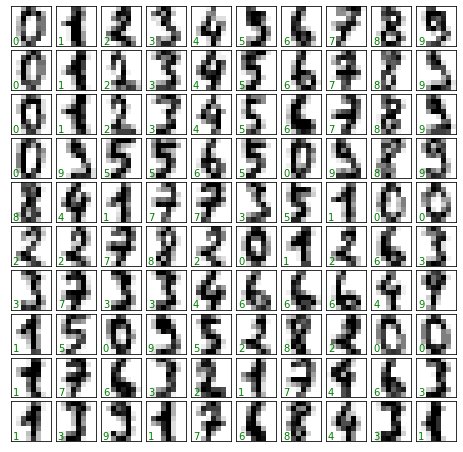

In [12]:
#first hundred of the arrays 8x8
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [13]:
X = digits.data
X.shape

(1797, 64)

In [14]:
#there are 1797 samples and 64 features
y = digits.target
y.shape

(1797,)

In [15]:
#unsupervised learning: Dimensionality reduction
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

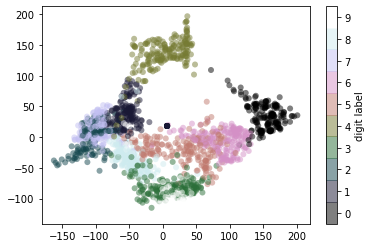

In [7]:
#plotting the data from the projected 2-dimensional data
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('cubehelix', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [16]:
#classification on digits
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [17]:
#using classification alogorithm to the digits
#split the data into a training and testing set and fit a Gaussian Bayes model

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [18]:
#gauging its accuracy by comparing the true values of the test set to the prdecitions

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

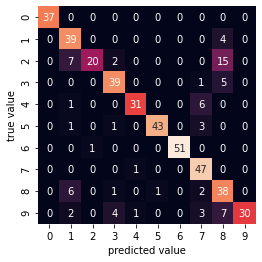

In [20]:
#shows 80% accuracy 
#use confusion matrix which can compute with Scikit-Learn and plot with Seaborn

from sklearn.metrics import confusion_matrix
import seaborn as sns #add this to use sns
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

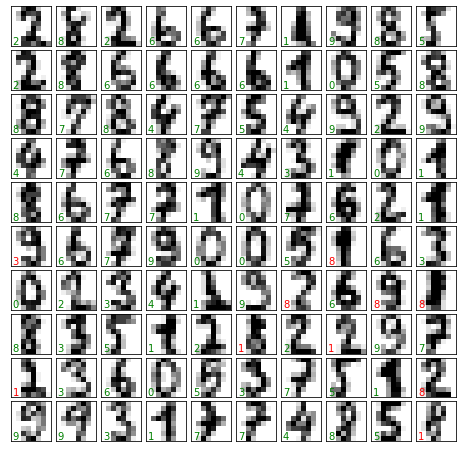

In [21]:
#insight regarding where the algorithm might not be performing optimally
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')